This code is used to plot the data from the csv file of the data collected from the sensors and plot the data in a graph
both individual and combined graphs. This code expects that the data from the ADC sled on Rocksat-X is in the format as processed by RawADC2windingCurrents.py The code is written in python and uses the matplotlib, numpy and pandas libraries.

[]: # Path: src/plotData.ipynb

- Author: Nicholas Limparis
- Date: 01/26/2023
- Version: 1.0
- Python Version: 3
- Dependencies: matplotlib, numpy, pandas
 

TO Do list

1. Calibration Data for the ADC, and the IMU
2. Process the data to get the current and voltage values with the calibration data
3. 


In [2]:
# Here we open the files and load the data into a pandas dataframe

# Open the file for reading
#Check to see if the file exists
inputFileNameADC = "../outputData/" + dataSet + "_ADCCurrentReadings.dat"
if not os.path.isfile(inputFileNameADC): 
    sys.exit("The input file given is not a file")   
else:
    #dataFileNameList = inputFileName.split(os.sep)        #
    #dataFileNameSplit = dataFileNameList[len(dataFileNameList)-1].split(".") # This gives us the final part of the data filename string
    #dataFileName = dataFileNameSplit[0]

# We have verified that the file exists
# Now we can open it Lets start with the current data
# We will use the pandas read_csv function to read in the data

In [11]:
#Documentation variables
__author__ = 'Nicholas M Limparis'
__copyright__ = 'Copyright 2023, UMD Rocksat-X'
__credits__ = ['Nicholas M Limparis']
__license__ = '{MIT}'
__maintainer__ = 'Nicholas M Limparis'
__email__ = 'nicholas@github.limpar.is'
__status__ = 'Dev'

#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.markers as mmarkers
import os
import sys

#Which data to plot
dataSet = "Data64"

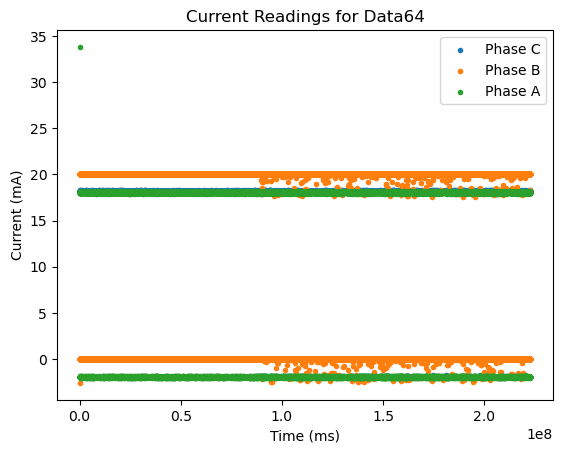

In [16]:
# Now we need to parse the current data into a pandas dataframe from inputLines
# We will use the first line as the column headers
# There are 4 Data chuncks in the file seperated by commas
# 1. Time stamp in ms
# 2. Current in mA of phase A
# 3. Current in mA of phase B
# 4. Current in mA of phase C


#now we need to parse the data into a pandas dataframe from the csv file
adcData = pd.read_csv(inputFileNameADC, header=0, names=['Time', 'PhaseA', 'PhaseB', 'PhaseC'])

# Now we need to plot the data
# We will plot the data in a 3x1 subplot
# The first subplot will be the current of phase A
# The second subplot will be the current of phase B
# The third subplot will be the current of phase C
#plt.scatter(adcData['Time'], adcData['PhaseA'], label='Phase A')
#plt.scatter(adcData['Time'], adcData['PhaseB'], label='Phase B')
fig, ax = plt.subplots()


ax.scatter(adcData['Time'], adcData['PhaseC'], label='Phase C', marker=".")
ax.scatter(adcData['Time'], adcData['PhaseB'], label='Phase B', marker=".")
ax.scatter(adcData['Time'], adcData['PhaseA'], label='Phase A', marker=".")


ax.set_xlabel('Time (ms)')
ax.set_ylabel('Current (mA)')
ax.set_title('Current Readings for ' + dataSet)
ax.legend()


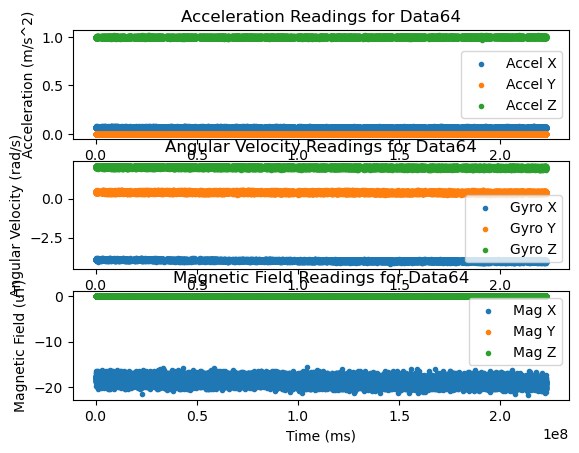

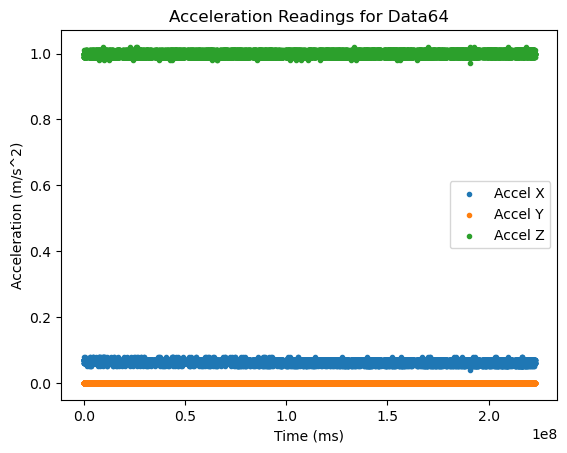

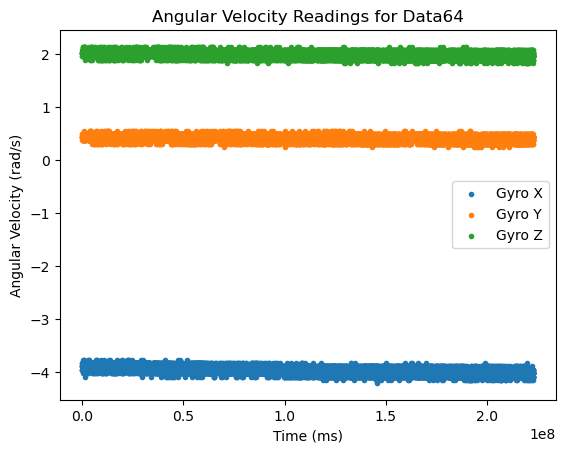

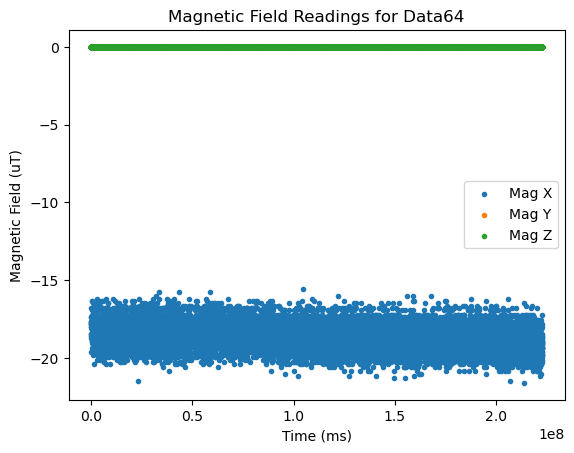

In [19]:
#Now we need to process the IMU data
#We will open the file and read it into a pandas dataframe
#We will then plot the data in a 3x1 subplot with the first subplot being the acceleration
#The second subplot being the angular velocity
#The third subplot being the magnetic field/magnetometer data

#First we need to open the file and read it into a pandas dataframe
imuData = pd.read_csv("../outputData/" + dataSet + "_IMUReadings.dat", header=0, names=['Time', 'AccelX', 'AccelY', 'AccelZ', 'GyroX', 'GyroY', 'GyroZ', 'MagX', 'MagY', 'MagZ'])

#The data is loaded and now we need to plot it
figIMU, axIMU = plt.subplots(ncols=1,nrows=3)   # Create a figure containing a single axes.

axIMU[0].scatter(imuData['Time'], imuData['AccelX'], label='Accel X', marker=".")
axIMU[0].scatter(imuData['Time'], imuData['AccelY'], label='Accel Y', marker=".")
axIMU[0].scatter(imuData['Time'], imuData['AccelZ'], label='Accel Z', marker=".") 
axIMU[0].set_xlabel('Time (ms)')
axIMU[0].set_ylabel('Acceleration (m/s^2)')
axIMU[0].set_title('Acceleration Readings for ' + dataSet)
axIMU[0].legend()

axIMU[1].scatter(imuData['Time'], imuData['GyroX'], label='Gyro X', marker=".")
axIMU[1].scatter(imuData['Time'], imuData['GyroY'], label='Gyro Y', marker=".")
axIMU[1].scatter(imuData['Time'], imuData['GyroZ'], label='Gyro Z', marker=".")
axIMU[1].set_xlabel('Time (ms)')
axIMU[1].set_ylabel('Angular Velocity (rad/s)')
axIMU[1].set_title('Angular Velocity Readings for ' + dataSet)
axIMU[1].legend()

axIMU[2].scatter(imuData['Time'], imuData['MagX'], label='Mag X', marker=".")
axIMU[2].scatter(imuData['Time'], imuData['MagY'], label='Mag Y', marker=".")
axIMU[2].scatter(imuData['Time'], imuData['MagZ'], label='Mag Z', marker=".")
axIMU[2].set_xlabel('Time (ms)')
axIMU[2].set_ylabel('Magnetic Field (uT)')
axIMU[2].set_title('Magnetic Field Readings for ' + dataSet)
axIMU[2].legend()

#Now will plot the data as seperate plots

figIMUAccel, axIMUAccel = plt.subplots()   # Create a figure containing a single axes.
figIMUGyro, axIMUGyro = plt.subplots()   # Create a figure containing a single axes.
figIMUMag, axIMUMag = plt.subplots()   # Create a figure containing a single axes.


axIMUAccel.scatter(imuData['Time'], imuData['AccelX'], label='Accel X', marker=".")
axIMUAccel.scatter(imuData['Time'], imuData['AccelY'], label='Accel Y', marker=".")
axIMUAccel.scatter(imuData['Time'], imuData['AccelZ'], label='Accel Z', marker=".")
axIMUAccel.set_xlabel('Time (ms)')
axIMUAccel.set_ylabel('Acceleration (m/s^2)')
axIMUAccel.set_title('Acceleration Readings for ' + dataSet)
axIMUAccel.legend()

axIMUGyro.scatter(imuData['Time'], imuData['GyroX'], label='Gyro X', marker=".")
axIMUGyro.scatter(imuData['Time'], imuData['GyroY'], label='Gyro Y', marker=".")
axIMUGyro.scatter(imuData['Time'], imuData['GyroZ'], label='Gyro Z', marker=".")
axIMUGyro.set_xlabel('Time (ms)')
axIMUGyro.set_ylabel('Angular Velocity (rad/s)')
axIMUGyro.set_title('Angular Velocity Readings for ' + dataSet)
axIMUGyro.legend()

axIMUMag.scatter(imuData['Time'], imuData['MagX'], label='Mag X', marker=".")
axIMUMag.scatter(imuData['Time'], imuData['MagY'], label='Mag Y', marker=".")
axIMUMag.scatter(imuData['Time'], imuData['MagZ'], label='Mag Z', marker=".")
axIMUMag.set_xlabel('Time (ms)')
axIMUMag.set_ylabel('Magnetic Field (uT)')
axIMUMag.set_title('Magnetic Field Readings for ' + dataSet)
axIMUMag.legend()




